In [13]:
import pandas as pd
from datetime import datetime
df=pd.read_csv('output/member.csv')
data=[]
id=[]
for i,rows in df.iterrows():
    date_obj = datetime.strptime(rows['时间戳记'].split(' ')[0], "%Y-%m-%d")
    target_date = datetime(date_obj.year, 9, 20)
    
    # if rows['身份證統一編號'] not in id:
    data.append(rows['加入的經銷商證號 '])
    id.append(rows['身份證統一編號'])
len(data),len(id)

(4554, 4554)

time: 187 ms (started: 2023-12-16 01:41:26 +08:00)


In [19]:
counts=pd.DataFrame(data).value_counts()
counts

張雁婷      625
郭曉菁      455
大德呂佳蓁    327
許淯堤      310
徐韻婷      276
        ... 
媃芸         1
江珮慈        1
宋佩芬        1
武廟店        1
李政瀚        1
Length: 202, dtype: int64

time: 16 ms (started: 2023-12-16 01:42:01 +08:00)


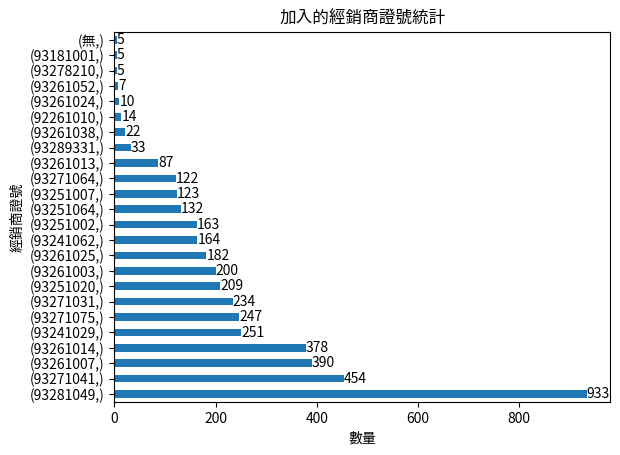

time: 203 ms (started: 2023-12-16 01:41:26 +08:00)


In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

# 创建水平条形图
counts=counts[counts>4]
ax = counts.plot(kind='barh')

# 在每个条形上显示数值
for i, v in enumerate(counts):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

# 添加标题和标签
plt.title('加入的經銷商證號統計')
plt.xlabel('數量')
plt.ylabel('經銷商證號')

# 显示图表
plt.show()


In [16]:
data=[]
id=[]
from datetime import datetime

for i,rows in df.iterrows():    
    date_obj = datetime.strptime(rows['时间戳记'].split(' ')[0], "%Y-%m-%d")
    target_date = datetime(date_obj.year, 9, 25)
    source_data=datetime(date_obj.year,11,30)
    if rows['身份證統一編號'] not in id and date_obj>=target_date and date_obj<=source_data:
        data.append(rows['推薦人'])
        id.append(rows['身份證統一編號'])
duplicated_name = {'許淯堤': ['小玉', '小淯', '小育', '林神店', '林森許淯堤'],
                   '謝怡靜': ['怡靜', '赤山怡靜', '赤山店'],
                   '張雁婷': ['小草', '張小草', '大林蒲']}
mapping = {}
for key, values in duplicated_name.items():
    for value in values:
        mapping[value] = key
data = [mapping.get(item, item) for item in data]
len(data)

3739

time: 250 ms (started: 2023-12-16 01:41:27 +08:00)


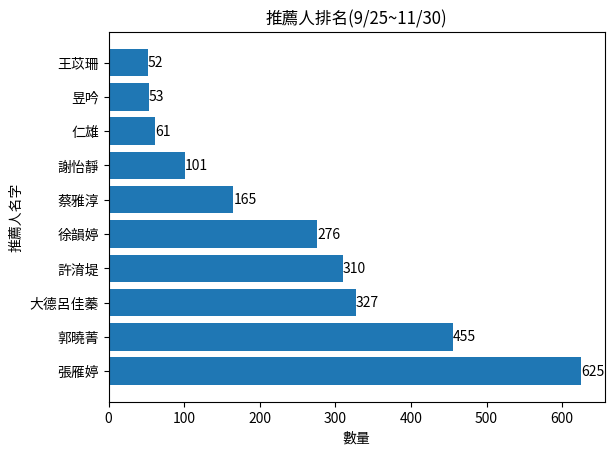

time: 109 ms (started: 2023-12-16 01:41:27 +08:00)


In [17]:
import matplotlib.pyplot as plt

commender = pd.DataFrame(data).value_counts()
counts = commender[:10]

# 创建水平条形图
plt.barh([i[0] for i in counts.keys()], counts.values)

# 在每个条形上显示数值
for i, v in enumerate(counts.values):
    plt.text(v, i, str(v), color='black', va='center')

# 添加标题和标签
plt.title('推薦人排名(9/25~11/30)')
plt.xlabel('數量')
plt.ylabel('推薦人名字')

# 显示图表
plt.show()


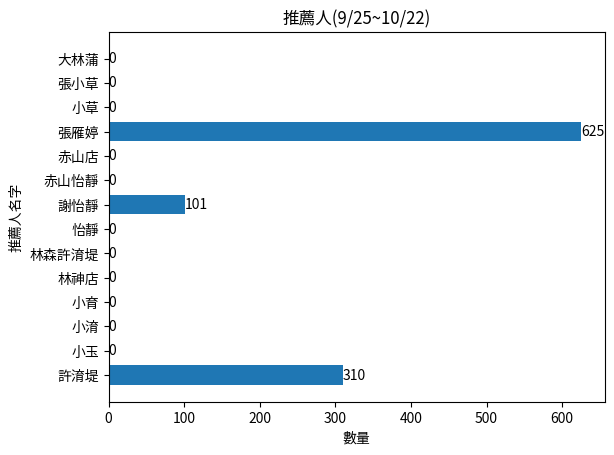

time: 125 ms (started: 2023-12-16 01:41:27 +08:00)


In [18]:
import matplotlib.pyplot as plt
people_to_get_counts = ['許淯堤','小玉','小淯','小育','林神店','林森許淯堤','怡靜','謝怡靜','赤山怡靜','赤山店','張雁婷','小草','張小草','大林蒲']
commender = pd.DataFrame(data).value_counts()

counts={'key':[],'value':[]}
for name in people_to_get_counts:  
    if name in commender.keys():
        
        counts['key'].append(name)
        counts['value'].append(commender[name])
    else:
        counts['key'].append(name)
        counts['value'].append(0)

# 创建水平条形图
plt.barh(counts['key'], counts['value'])

for index, value in enumerate(counts['value']):
    plt.text(value, index, str(value), ha='left', va='center')


# 添加标题和标签
plt.title('推薦人(9/25~10/22)')
plt.xlabel('數量')
plt.ylabel('推薦人名字')

# 显示图表
plt.show()
